In [21]:
#Importo librerie utili al programma
import numpy as np
import random as rd
import math as mp
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
import csv
import seaborn as sns

In [22]:
#Variabili tutili al programma
steps=100
birds=50
ndim=3
step= 99

Dai file di testo, prodotti dal programmi precedenti, leggo le velocità e le posizioni degli uccelli per ogni step e solo per uno step fissato in precedenza.
Si ricordi di modificare sempre il nome del file di cui si sta leggendo, il numero degli uccelli, numero di steps usati e step di riferimento, per poter eseguire i calcoli.
Nei file di testo ogni n righe (n=birds) rappresenta un singolo step.

In [30]:
vel_file = open("vel3D birds=50 steps=100 b=0.5.txt")
pos_file = open("vel3D birds=50 steps=100 b=0.5.txt")
read_vel = csv.reader(vel_file, delimiter=" ")
read_pos = csv.reader(pos_file, delimiter=" ")
file_vel = []
file_pos = []

for row in read_vel:
    file_vel.append(row)

for row1 in read_pos:
    file_pos.append(row1)
    
#Trasformo ciò che ho letto nei file in matrici numpy
file_vel_tot = np.array(file_vel,dtype=float)
file_pos_tot = np.array(file_pos,dtype=float)

#Eseguo questo calcolo per prendere solo gli uccelli ad un certo step fissato
cont=step
i=0
data_vel = np.zeros((birds, 3))
data_pos = np.zeros((birds, 3))
fine=cont+birds

while cont < (fine):
   data_vel[i]=file_vel_tot[cont]
   data_pos[i]=file_pos_tot[cont]
   cont+=1
   i+=1

Calcolo delle fluttuazioni U:
![Fluttuazioni](Fluttuazioni.png)

In [31]:
velstep=data_vel
U=np.zeros((birds,ndim))
VelMedia=np.mean(velstep,axis=0)
for j in range (birds):
    U[j] = velstep[j] - VelMedia
        
#controllo che u sia uguale a zero
controll= np.round(np.sum(U,axis=0),1)
print(controll)

[-0. -0. -0.]


Funzione di correlazione:
![Correlazione](Correlazione.jpg)

In [171]:
#Funzione delta correlazione
def delta(sigma):
    if sigma == 0:
        return 1
    else:
        return 0
    
#Funzione correlazione C(r) per uno step
def correlation(r):
    velox=U
    posix=data_pos
    som=0
    somDelta=0
    for i in range (birds):
        for j in range (birds):
            if i != j:
                modvi=np.linalg.norm(velox[i])
                modvj=np.linalg.norm(velox[j])
                si=velox[i]/modvi
                sj=velox[j]/modvj
                r1=np.round(np.linalg.norm(posix[i]-posix[j]),0)
                delt=delta(r-r1)
                somj=np.dot(si,sj)*delt
                som = som + somj
                somDelta = somDelta + delt
    if somDelta == 0:
        return False,0
    else:
        return True,(som / somDelta)

Calcolo valore correlazione per ogni r dell'array r2 e stampo il grafico relativo.


In [112]:
massimo = 35
r2 = np.arange(0,massimo,1)
cor = []
r = []
for i in range (r2.size):
    result = correlation(r2[i])
    if result[0] == True:
        cor.append(np.round(result[1],2))
        r.append(r2[i])
    print(i)
cor=np.array(cor)
r=np.array(r)

plt.plot(r, cor, marker = "o", color = 'red')
plt.title("Grafico correlazione")
plt.xlabel("R") 
plt.ylabel("Correlation(R)")
plt.show()

KeyboardInterrupt: 

Rappresentazione volume ad un certo step t

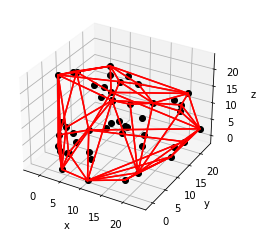

In [7]:
pts=data_pos
hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

Calcolo polarizzazione:
![Polarizzazione](Polarizzazione.png)

In [8]:
array=np.zeros((birds,ndim))
for j in range (birds):
    norm = np.linalg.norm(data_vel[j])
    array[j] = data_vel[j] / norm
pol=np.linalg.norm(np.mean(array,axis=0))
print(pol)

0.8396391048154993


In [174]:
#Nomalizzo le velocità medie
VelNorm=VelMedia/np.linalg.norm(VelMedia)

Quantificazione dell'anisotropia dello stormo:
![Anisotropia](anisotropia.png)

In [175]:
position=data_pos
veloc=data_vel
mini=200
matrix=np.zeros((birds,3,3))
for i in range(birds):
    for j in range(birds):
        if i != j:
            val=np.linalg.norm(position[i]-position[j])
            if val < mini:
                j1=j
                mini=val
    ui=(veloc[i]/np.linalg.norm(veloc[i]))
    uj=(veloc[j1]/np.linalg.norm(veloc[j1]))
    matrix[i][0][0]=ui[0]*uj[0]
    matrix[i][0][1]=ui[0]*uj[1]
    matrix[i][0][2]=ui[0]*uj[2]
    matrix[i][1][0]=ui[1]*uj[0]
    matrix[i][1][1]=ui[1]*uj[1]
    matrix[i][1][2]=ui[1]*uj[2]
    matrix[i][2][0]=ui[2]*uj[0]
    matrix[i][2][1]=ui[2]*uj[1]
    matrix[i][2][2]=ui[2]*uj[2]
    mini=200

Mmedio=np.mean(matrix,axis=0)
autovalori, autovettori = np.linalg.eig(Mmedio)
low=min(autovalori)
index,=np.where(autovalori==low)
autovet=autovettori[index,:]
vet=autovet/np.linalg.norm(autovet)
gamma=pow(vet[0][0]*VelNorm[0]+vet[0][1]*VelNorm[1]+vet[0][2]*VelNorm[2],2)
print(gamma)

0.16974289794942088


Calcolo modulo velocità media per ogni uccello ad ogni step

In [32]:
velMedia_tot=np.linalg.norm(file_vel_tot, axis=1)
velMedia=np.zeros((steps,birds))
t=0
ucc=0
for i in range (velMedia_tot.size):
    velMedia[t][ucc]=velMedia_tot[i]
    ucc+=1
    if ucc==birds:
        ucc=0
        t+=1    

Stampo grafico del modulo della velocità per ogni uccello - ogni step

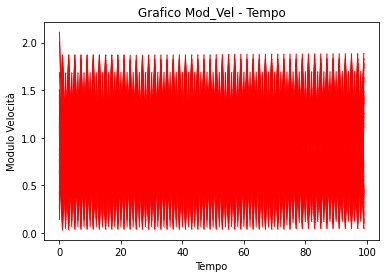

In [33]:
tempo=[]
for j in range (velMedia.shape[0]):
    tempo.append(j)
tempo=np.array(tempo)

plt.plot(tempo, velMedia, marker = "o", color = 'red',linewidth=1, markersize=0.11)
plt.title("Grafico Mod_Vel - Tempo")
plt.xlabel("Tempo") 
plt.ylabel("Modulo Velocità")

plt.show()

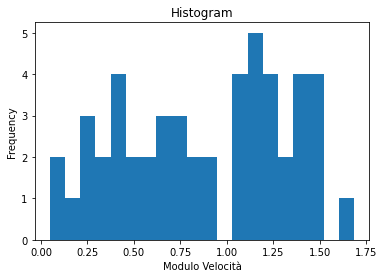

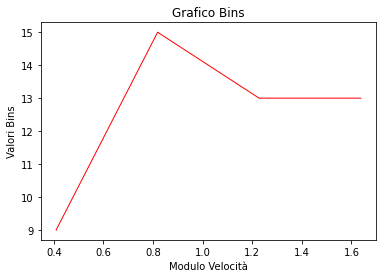

In [34]:
ModVelUcc=np.linalg.norm(data_vel,axis=1)
minMod=min(ModVelUcc.reshape(-1,1))
maxMod=max(ModVelUcc.reshape(-1,1))
rang=(maxMod-minMod)/4
Bins=np.zeros(4)
rangValue=np.array((rang,rang*2,rang*3,rang*4))
for i in range (birds):
    velb=ModVelUcc[i]
    if velb < rang:
        Bins[0]+=1
    elif velb < (rang*2):
        Bins[1]+=1
    elif velb < (rang*3):
        Bins[2]+=1
    else:
        Bins[3]+=1
        
plt.hist(ModVelUcc, bins=20)
plt.xlabel("Modulo Velocità")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

plt.plot(rangValue, Bins, marker = "o", color = 'red',linewidth=1, markersize=0.11)
plt.title("Grafico Bins")
plt.xlabel("Modulo Velocità") 
plt.ylabel("Valori Bins")

plt.show()